In [21]:
import pandas as pd
import re
import matplotlib.pyplot as plt
df=pd.read_csv(r'F:\IE Courses\Data Mining\datasets-master\E_commerce.csv')

In [22]:
def Regex(txt):
    txt=re.sub('[p()]','',txt)
    txt=re.sub('[,]','',txt)
    return txt

In [23]:
df['Quarter']=df['Quarter'].apply(lambda x:Regex(x))
df['E-commerce(millions of dollars)']=df['E-commerce(millions of dollars)'].apply(lambda x:Regex(x))

In [24]:
df['Quarter']=df['Quarter'].str.replace('1st quarter','01 01')
df['Quarter']=df['Quarter'].str.replace('2nd quarter','04 01')
df['Quarter']=df['Quarter'].str.replace('3rd quarter','07 01')
df['Quarter']=df['Quarter'].str.replace('4th quarter','10 01')

In [25]:
df['Quarter']=df['Quarter'].str.replace(' ','-')

In [26]:
df['Quarter']=pd.to_datetime(df['Quarter'])
df['E-commerce(millions of dollars)']=df['E-commerce(millions of dollars)'].astype('float64')

In [27]:
df.Quarter[1]

Timestamp('2019-10-01 00:00:00')

In [28]:
df.drop(columns='Total(millions of dollars)',inplace=True)

In [29]:
df=df.set_index('Quarter')

In [30]:
series=df.iloc[:,0]

## Stationary
mean,variance and co-variance is constant over periods

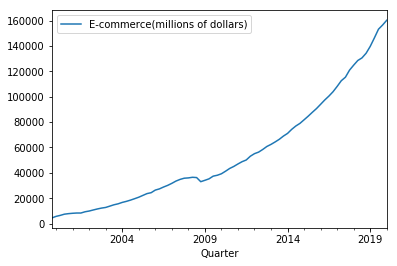

In [31]:
df.plot()

[]

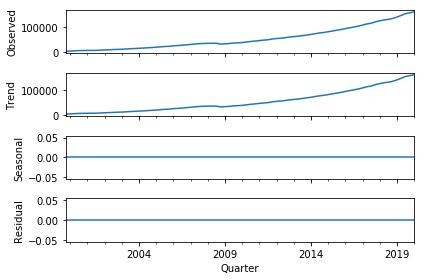

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='additive', freq=1)

result.plot()
plt.plot()

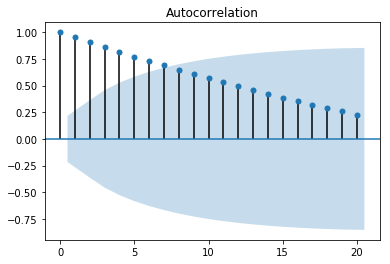

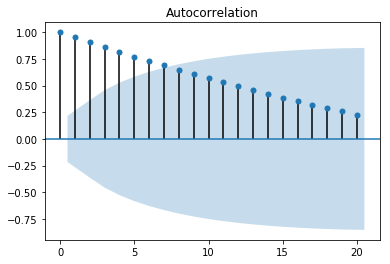

In [67]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

### Check for stationary using Ad Fuller Hypothesis test

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [104]:
from statsmodels.tsa.stattools import adfuller
hypothesis_test=adfuller(X)
print('ADF Statistic: %f' % hypothesis_test[0])
print('p-value: %f' % hypothesis_test[1])
print('Critical Values:')
for key, value in hypothesis_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.911068
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


p<0.05 so we reject the null hypothesis and the Time series is Stationary

In [68]:
df.diff(periods=1).head()

,E-commerce(millions of dollars)
Quarter,
2020-01-01,NaN
2019-10-01,-3752.0
2019-07-01,-3307.0
2019-04-01,-6926.0
2019-01-01,-6635.0


In [13]:
df_diff=df.diff(periods=1) #Integrated of order 1 denoted by d

In [47]:
df_diff=df_diff[1:]
df_diff.head()## 1 Lag

,E-commerce(millions of dollars)
Quarter,
2019-04-01,-6926.0
2019-01-01,-6635.0
2018-10-01,-5422.0
2018-07-01,-3666.0
2018-04-01,-2009.0


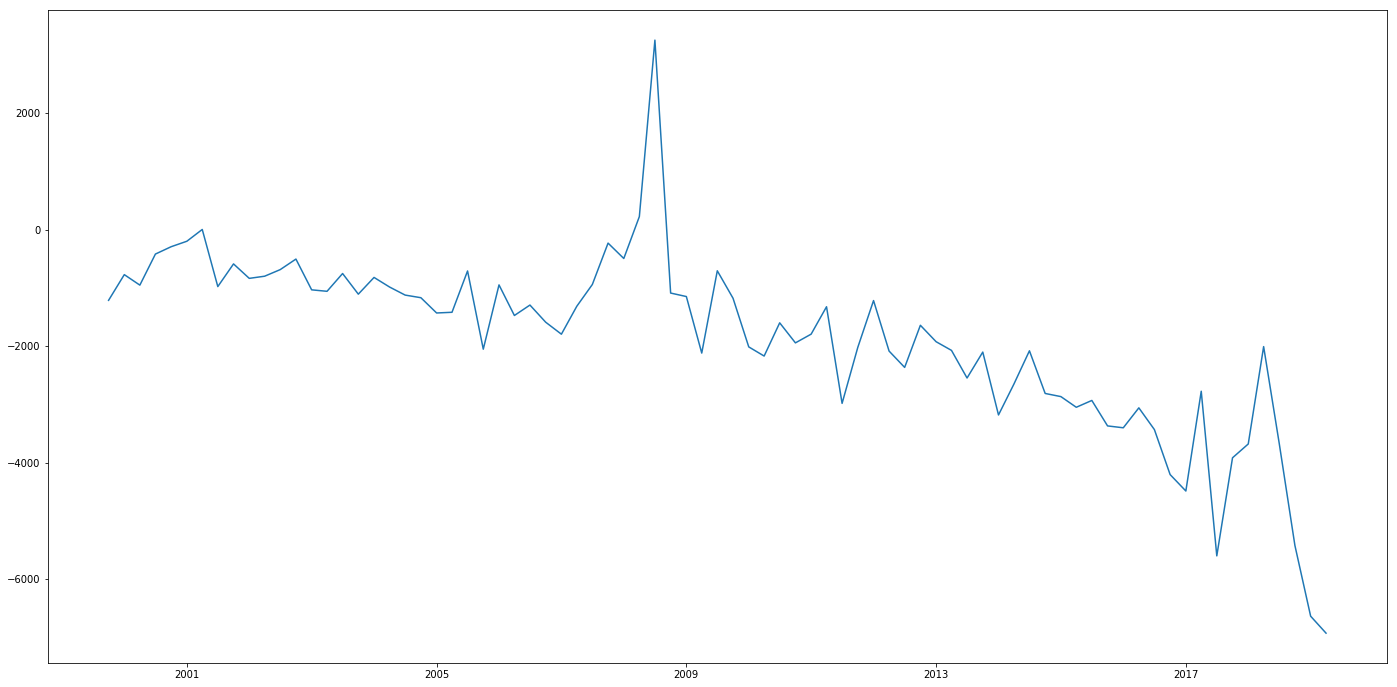

In [53]:
plt.figure(figsize=(24,12))
plt.plot(df_diff)

In [122]:
X=df.iloc[::-1].values

In [123]:
train=X[:60] #60 datasets
test=X[60:] #22 datasets

## ARIMA Model

In [124]:
from statsmodels.tsa.arima_model import ARIMA

In [125]:
#p Periods taken for autogressive model
#d Integrated order difference
#q periods in moving average model
model_arima=ARIMA(train,order=(1,1,1))
model_fit=model_arima.fit()
model_fit.aic

959.7506307306176

In [129]:
predictions=model_fit.forecast(steps=22)[0]

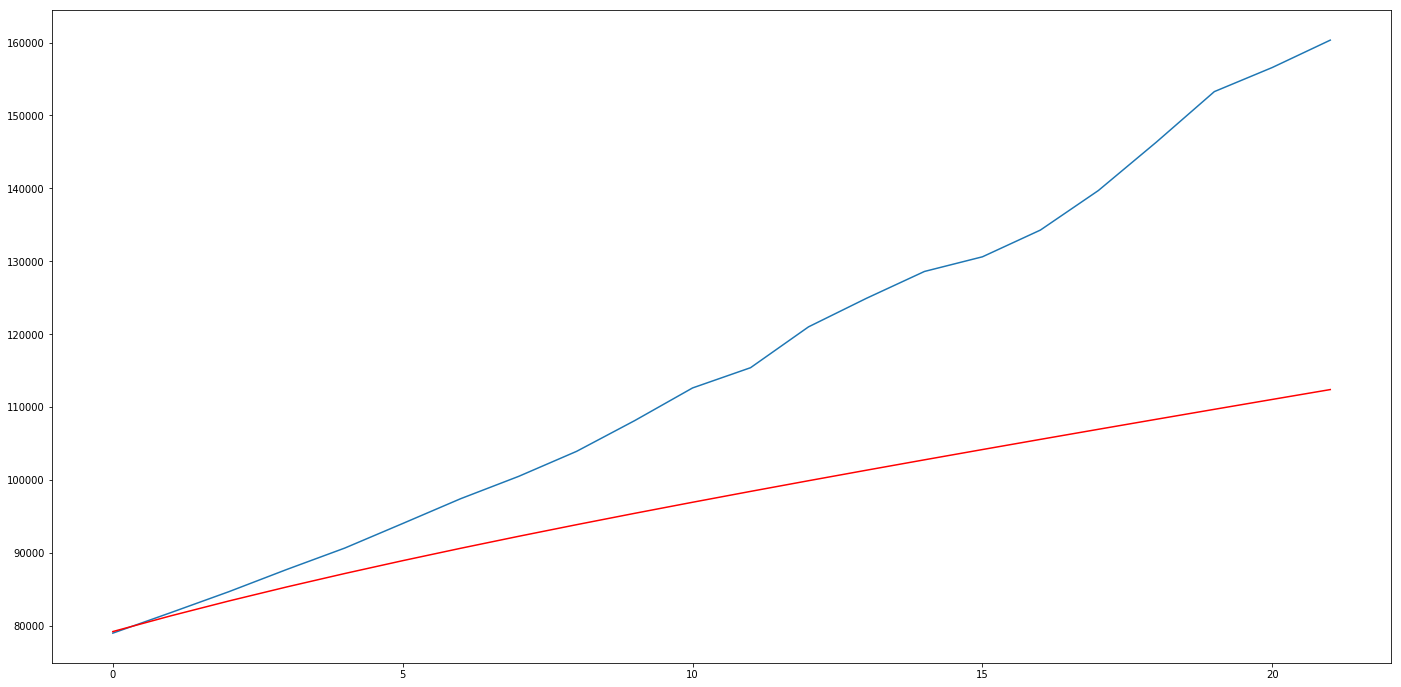

In [130]:
plt.figure(figsize=(24,12))
plt.plot(test)
plt.plot(predictions,color='red')


In [106]:
import itertools
p=d=q=range(0,5)
pdq =list(itertools.product(p,d,q))

In [115]:
import warnings
warnings.filterwarnings("ignore")
for i in pdq:
    try:
        model_arima=ARIMA(train,order=(i))
        model_fit=model_arima.fit()
        print(model_fit.aic," ",i)
    except:
        continue

1444.3870391673145   (0, 0, 0)
1370.936196792019   (0, 0, 1)
1264.6071842581227   (0, 0, 3)
1295.9625073498491   (0, 0, 4)
1042.3138599119281   (0, 1, 0)
1021.1957276221464   (0, 1, 1)
1009.8902363971739   (0, 1, 2)
1010.4025530391399   (0, 1, 3)
1009.5567787675063   (0, 1, 4)
991.95842955377   (0, 2, 0)
978.8939592890567   (0, 2, 1)
976.7608829358489   (0, 2, 2)
1137.744513941915   (1, 0, 0)
1097.2511348625997   (1, 0, 1)
1071.9247757757369   (1, 0, 2)
1066.192274248213   (1, 0, 3)
1060.2220609637418   (1, 0, 4)
1002.3415575663417   (1, 1, 0)
999.6315361839784   (1, 1, 1)
999.9036878365545   (1, 1, 2)
987.1501079427924   (1, 2, 0)
975.7805898632453   (1, 2, 1)
1038.267701487779   (2, 0, 0)
1001.4472387361793   (2, 1, 0)
999.7782500266711   (2, 1, 1)
999.5716698978299   (2, 1, 4)
987.538573611122   (2, 2, 0)
977.7802056716564   (2, 2, 1)
979.9765545807281   (2, 2, 3)
1034.8085532030075   (3, 0, 0)
1003.1858705018434   (3, 1, 0)
1001.7120482005955   (3, 1, 1)
982.7396296250747   (3, 2, 

### Selecting the parameter (p,d,q) -> (3,2,2) as it has minimum AIC

Text(0.5,1,'Actual vs Forecasted')

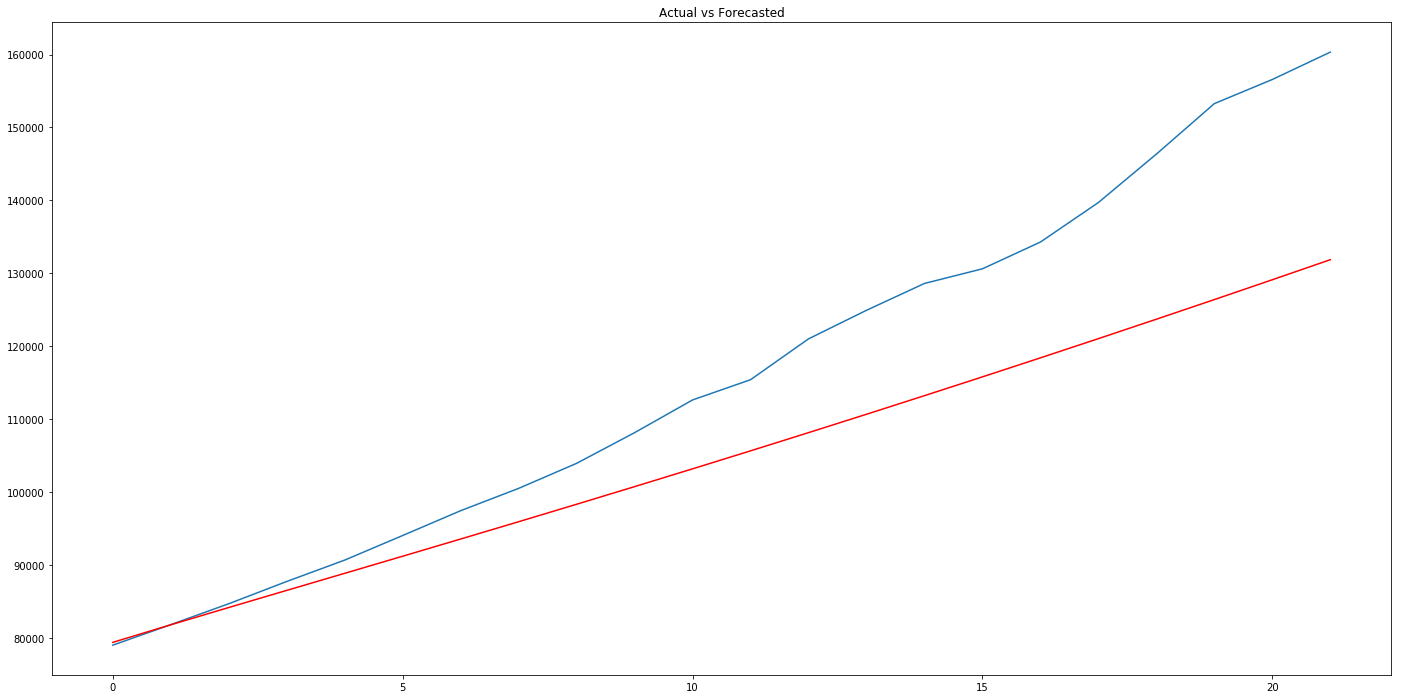

In [191]:
model_arima=ARIMA(train,order=(3,2,2))
model_fit=model_arima.fit()
predictions=model_fit.forecast(steps=22)[0]
plt.figure(figsize=(24,12))
plt.plot(test)
plt.plot(predictions,color='red')
plt.title('Actual vs Forecasted')

In [176]:
predictions.size
pred=pd.DataFrame({'Quarter':df[::-1].index[60:],'Actual':df.iloc[::-1][60:].values.reshape(-1),'Forecasted':predictions})

In [177]:
pred

,Quarter,Actual,Forecasted
0,2014-10-01,79024.0,79406.534189
1,2015-01-01,81837.0,81817.160705
2,2015-04-01,84704.0,84185.797341
3,2015-07-01,87754.0,86532.673296
4,2015-10-01,90687.0,88873.378174
5,2016-01-01,94057.0,91218.312271
6,2016-04-01,97459.0,93574.800126
7,2016-07-01,100519.0,95948.004909
8,2016-10-01,103952.0,98341.552565
9,2017-01-01,108157.0,100757.990817


In [182]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(pred.Actual,pred.Forecasted))


Mean Absolute Error: 11124.56351141614
